In [1]:
#MAT 201A Homework3 Intae Hwang
#Graph to signal code is originated from class demo
#I got some help from the site below
#http://stackoverflow.com/questions/18625085/how-to-plot-a-wav-file
#

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys

In [4]:
from scipy.io import wavfile

In [7]:
img = imread('/Users/intaehwang/Downloads/pro.png')

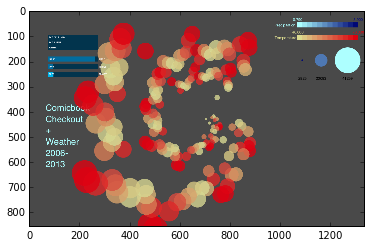

In [8]:
imshow(img)

The image above is created in Data-vis class

In [9]:
img.dtype

dtype('float32')

In [10]:
img.shape

(855, 1334, 3)

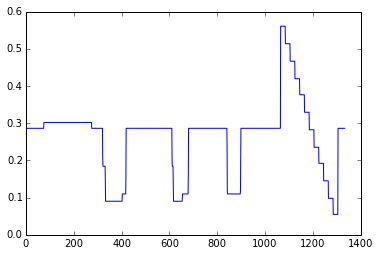

In [13]:
sig = img[100,:,2]
plot(sig)

Transformed the image into graph

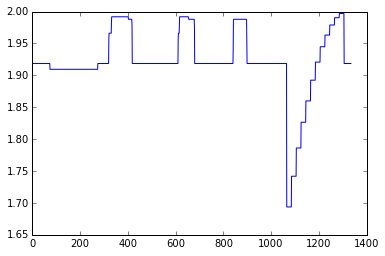

In [15]:
impulse = cos(sig) + cos(sig)
plot(impulse)

convert the graph with cos,sin functions

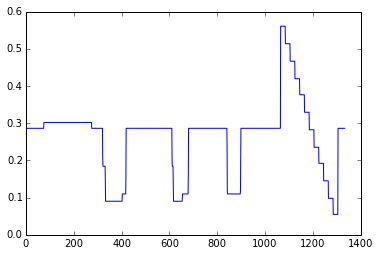

In [18]:
sigout =list(sig.astype(float32))
plot(sigout)

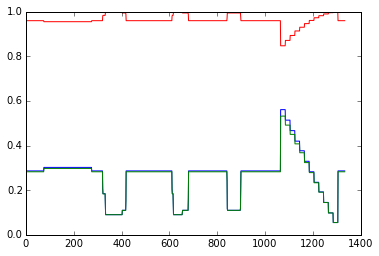

In [19]:
sigout = list(sig.astype(float32))
plot(sig)
plot(sin(sigout))
plot(cos(sigout))


Tried to check the difference between cos, sin function

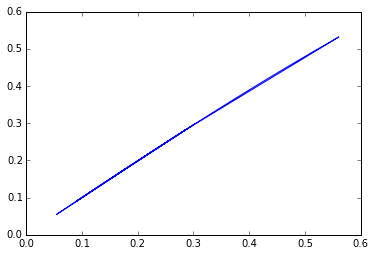

In [20]:
x = sin(sigout)
plot(sigout, x)

This is unexpected things

100.492 327.564


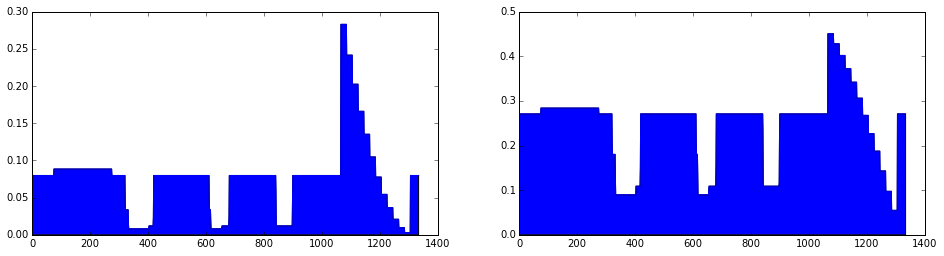

In [23]:
subplot(121)
plot(x*sin(sigout))
fill_between(arange(1334), x*sin(sigout))

subplot(122)
plot(x*cos(sigout))
fill_between(arange(1334),x*cos(sigout))

gcf().set_figwidth(16)

print sum(x*sin(sigout)), sum(x*cos(sigout))

56.6614 -242.997


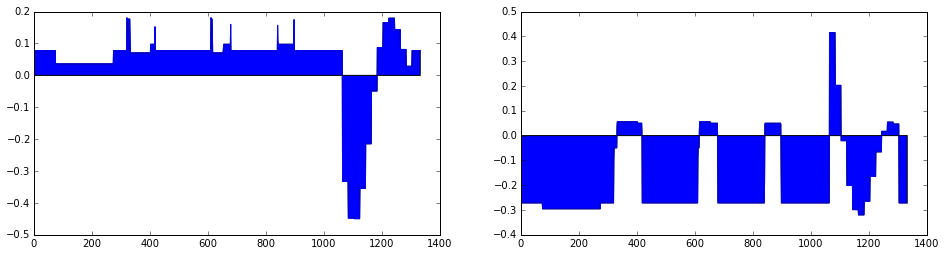

In [24]:
k=10
subplot(121)
plot(x*sin(k*sig))
fill_between(arange(1334), x*sin(k*sig))

subplot(122)
plot(x*cos(k*sig))
fill_between(arange(1334),x*cos(k*sig))

gcf().set_figwidth(16)

print sum(x*sin(k*sig)), sum(x*cos(k*sig))

Discrete Fourier Transform

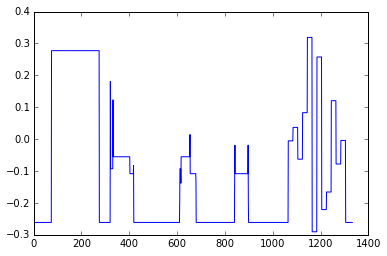

In [25]:
sigout2 = x*cos(k*sig*100)
plot(sigout2)

In [33]:
sig.dtype

dtype('float32')

In [34]:
len(sigout)

1334

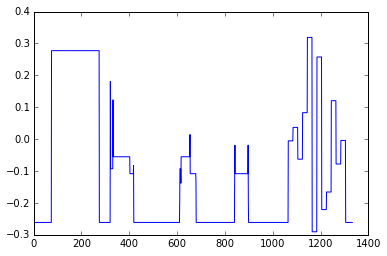

In [29]:
plot(sigout2)

In [35]:
amp_harm_rel = lambda x:1.0/x
print amp_harm_rel

amp_harm_rel(5)

<function <lambda> at 0x10c7b1e60>


0.2

Adding sinusoids

In [36]:
harmonics = arange(30) +1
amps = amp_harm_rel(harmonics)

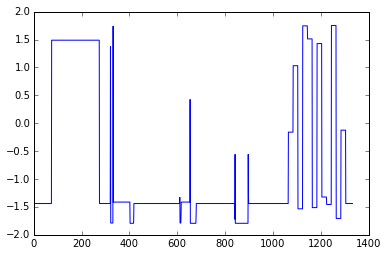

In [37]:
x = sigout2
out = zeros_like(x)
for harm, amp in zip(harmonics,amps):
    out += amp * sin(x*harm)

plot(out)

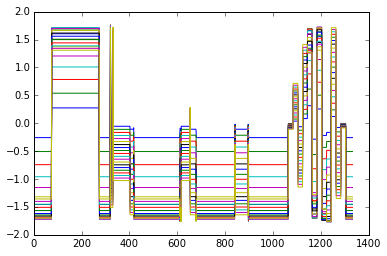

In [38]:
def add_harmonics(num, amp_harm_rel, numpoints =500):
    x = sigout2
    out = zeros_like(x)
    harmonics = arange(num) +1
    amps = amp_harm_rel(harmonics)
    for harm, amp in zip(harmonics,amps):
        out += amp * sin(x*harm)
    return out
    
amp_harm_rel = lambda x: 1.0/x
for i in range(20):
    plot(add_harmonics(i + 1, amp_harm_rel))

adding sin wave made a beautiful color varietion, 
but the amplitude did not changed, because it was not 
a wave graph.

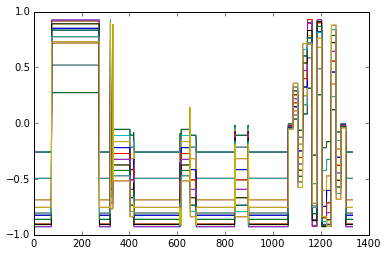

In [41]:
amp_harm_rel = (lambda x: ceil(x/2.0 - (x/2).astype(int)) * 1.0/x)
for i in range(20):
    plot(add_harmonics(i + 1, amp_harm_rel))

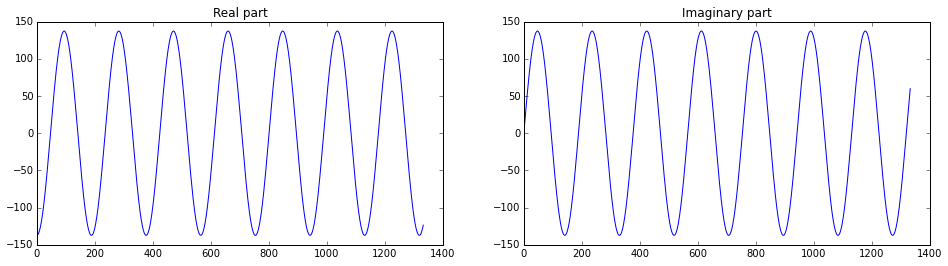

In [42]:
dft = []
for i in range(len(x)):
    fft_bin = complex(sum(x*cos(i * amp)), sum(-x*sin(i * amp)))
    dft.append(fft_bin)

subplot(121)
plot(real(dft))
title('Real part')

subplot(122)
plot(imag(dft))
title('Imaginary part')

gcf().set_figwidth(16)

performed Fourier transform

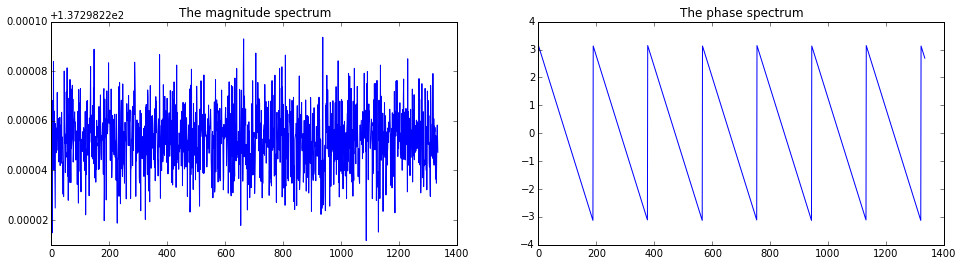

In [43]:
phs = sigout2
x = sin(sigout2)
subplot(121)
plot(abs(array(dft)))
title('The magnitude spectrum')

subplot(122)
plot(angle(array(dft)));
title('The phase spectrum')

gcf().set_figwidth(16)

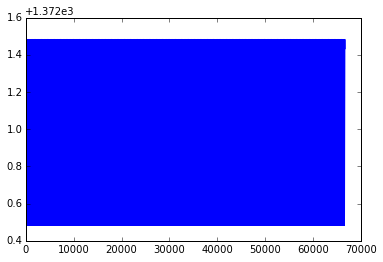

In [44]:
sigout21 = list(abs(array(dft)-0.05)*10)*50
plot(sigout21)
            

In [ ]:
wavfile.write('sigout27.wav',44100,array(sigout21, dtype=float32))

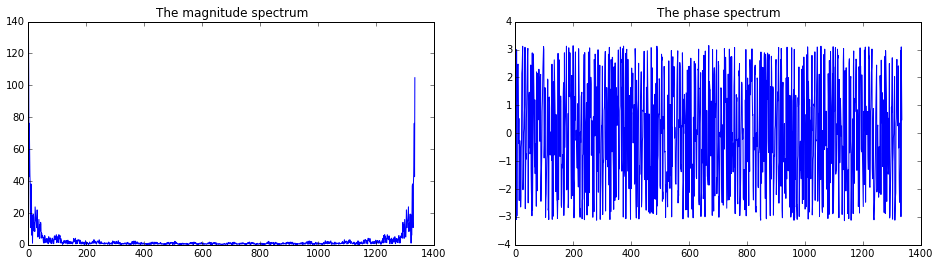

In [45]:
phs = sigout2
x = sin(sigout2)
subplot(121)
plot(abs(fft.fft(x)))
title('The magnitude spectrum')

subplot(122)
plot(angle(fft.fft(x)));
title('The phase spectrum')

gcf().set_figwidth(16)

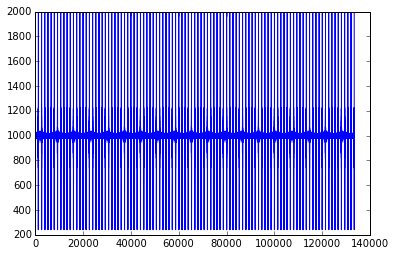

In [46]:
sigout22 = list(abs(fft.fft(x)+100)*10)*100
plot(sigout22)         

I recorded the result of the FFT, but they are still just sound.

In [ ]:
wavfile.write('sigout22.wav',44100,array(sigout22, dtype=uint8))

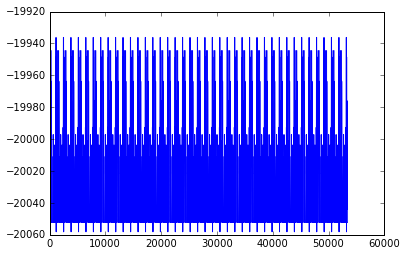

In [47]:
sigout3 = list((sigout2.astype(float32)-100)*200)*40
plot(sigout3)

In [ ]:
wavfile.write('sigout22.wav',44100,array(sigout3, dtype=uint8))

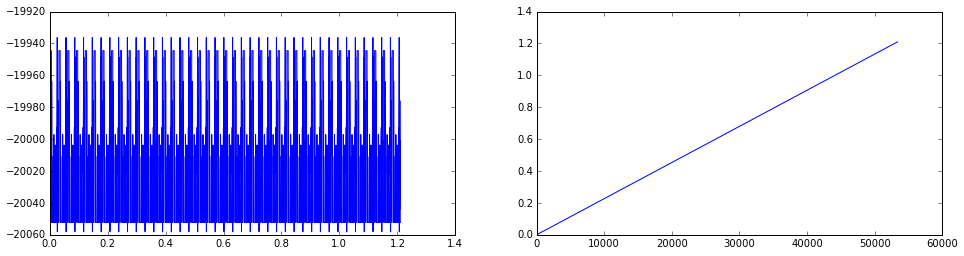

In [48]:
sr = 44100
nyquist = sr/1.0
Time=np.linspace(0,len(sigout3)/nyquist,num=len(sigout3))
subplot(121)
plt.plot(Time,sigout3)
subplot(122)
plt.plot(Time)
gcf().set_figwidth(16)

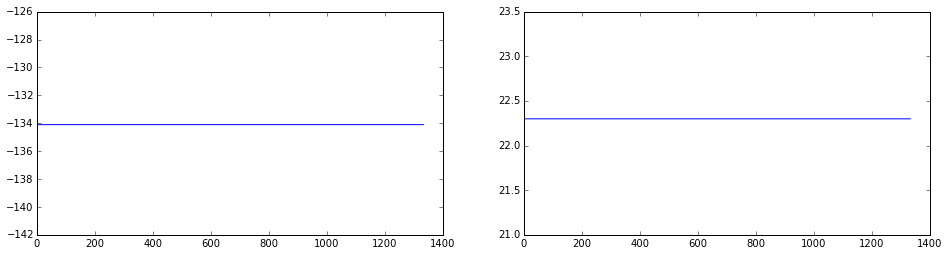

In [49]:
dft = []
for k in range(len(x)):
    bin_sigout = linspace(0,sig,1334, endpoint=False)
    fft_bin = complex(sum(x*cos(bin_sigout)),
                     -sum(x*sin(bin_sigout)))
    dft.append(fft_bin)
    
subplot(121)
plot(real(dft))

subplot(122)
plot(imag(dft))

gcf().set_figwidth(16)

I did Discrete Fourier Transform with image above, not a sin graph

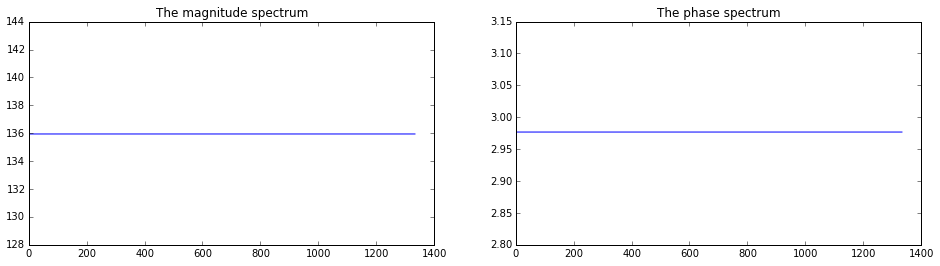

In [52]:
sig = img[100,:,1]
x = sin(sigout3)
subplot(121)
plot(abs(array(dft)))
title('The magnitude spectrum')

subplot(122)
plot(angle(array(dft)));
title('The phase spectrum')     

gcf().set_figwidth(16)

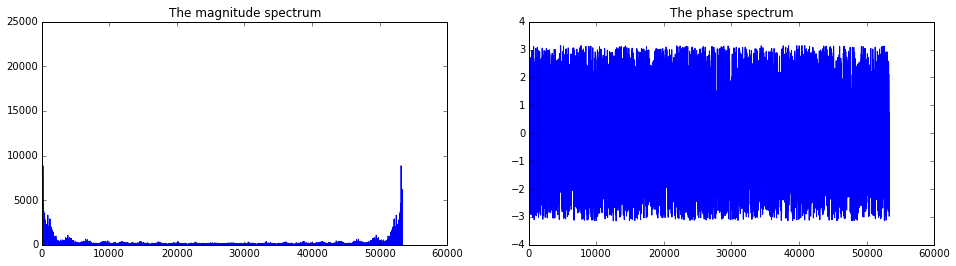

In [53]:
sig = img[100,:,1]
x = sin(sigout3)
subplot(121)
x1 = abs(fft.fft(x))
plot(x1)
title('The magnitude spectrum')

subplot(122)
plot(angle(fft.fft(x)));
title('The phase spectrum')     

gcf().set_figwidth(16)

In [ ]:
wavfile.write('sigout28.wav',44100,array(x1, dtype=float32))

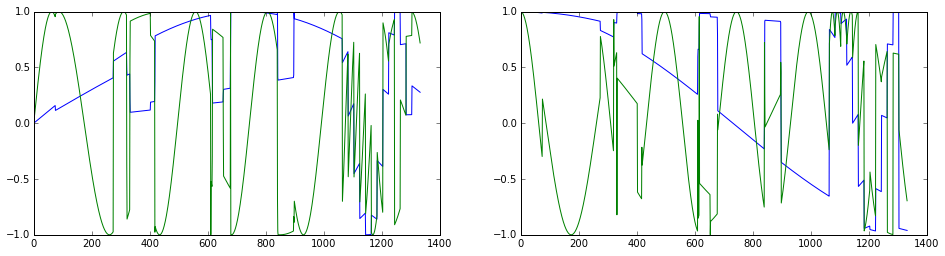

In [54]:
N = 128

k1 = 10
k2 = N -k1

subplot(121)
plot(sin(linspace(0,sig*k1,1334, endpoint=False)))
plot(sin(linspace(0,sig*k2,1334, endpoint=False)))

subplot(122)
plot(cos(linspace(0,sig*k1,1334, endpoint=False)))
plot(cos(linspace(0,sig*k2,1334, endpoint=False)))

gcf().set_figwidth(16)

I worked readDFTs with the original image, it gave me these interesting
graph.

array([53160,     0])

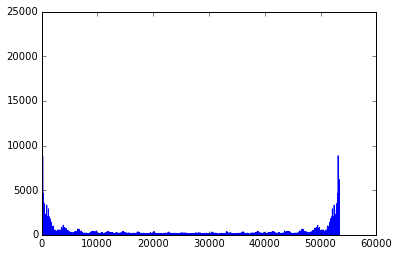

In [55]:
plot(abs(fft.fft(x)))
argsort(abs(fft.fft(x)))[-2:]

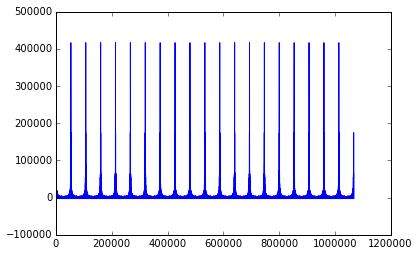

In [56]:
sigout3 = list(((abs(fft.fft(x))).astype(float32)-127)*20)*20
plot(sigout3)

In [ ]:
wavfile.write('sigout23.wav',44100,array(sigout3, dtype=uint8))

Sound graph looks like comb, but the sound is just a sound.

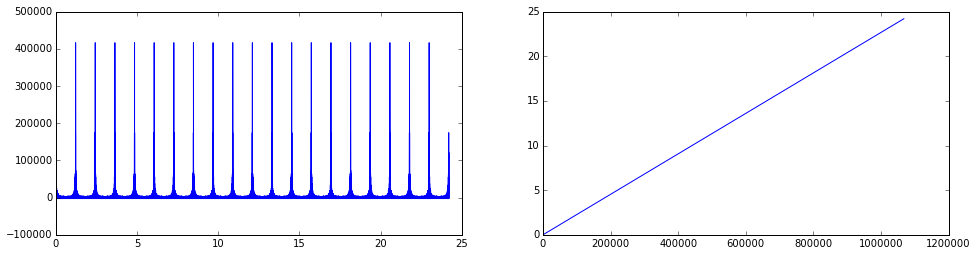

In [57]:
sr = 44100
nyquist = sr/1.0
Time=np.linspace(0,len(sigout3)/nyquist,num=len(sigout3))
subplot(121)
plt.plot(Time,sigout3)
subplot(122)
plt.plot(Time)
gcf().set_figwidth(16)

Scaling the DFT,

In [59]:
sr, signal = wavfile.read('sigout23.wav')

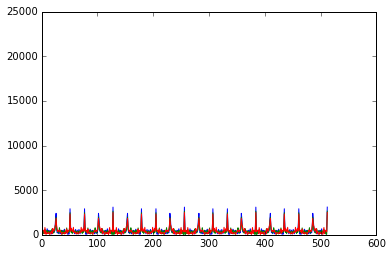

In [60]:
win1 = signal[0:1024]
win2 = signal[1024:2048]
win3 = signal[2048: 3072]

plot(abs(fft.rfft(win1)))
plot(abs(fft.rfft(win2)))
plot(abs(fft.rfft(win3)))

Short Term Fourier Transform, I continuesly used the sound made from the 
original image.

In [61]:
len(fft.rfft(x))

26681

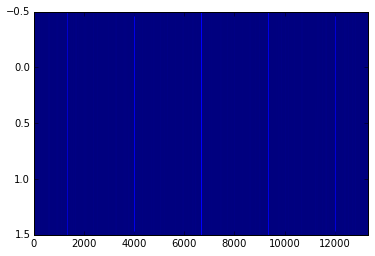

In [62]:
win_start = arange(0, 40000, 26681)
win_len = 26681

mag_spectrum = []

for start in win_start:
    win = signal[start: start + win_len]
    X = fft.rfft(win)
    mag_spectrum.append(abs(X)/float(win_len/2))

imshow(mag_spectrum, aspect='auto')

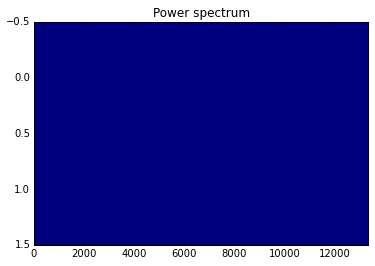

In [63]:
win_start = arange(0, 40000, 26681)
win_len = 26681

pow_spectrum = []

for start in win_start:
    win = signal[start: start + win_len]
    X = fft.rfft(win)
    pow_spectrum.append(abs(X)**2/float(win_len/2))

imshow(pow_spectrum, aspect='auto')
title('Power spectrum')

In [64]:
zip(mag_spectrum)

[(array([ 45.55127436,   0.10711801,   0.08795937, ...,   0.64687098,
           1.15062065,   3.55821112]),),
 (array([ 45.53875562,   0.11399012,   0.09512458, ...,   0.64660972,
           1.15083981,   3.55860815]),)]

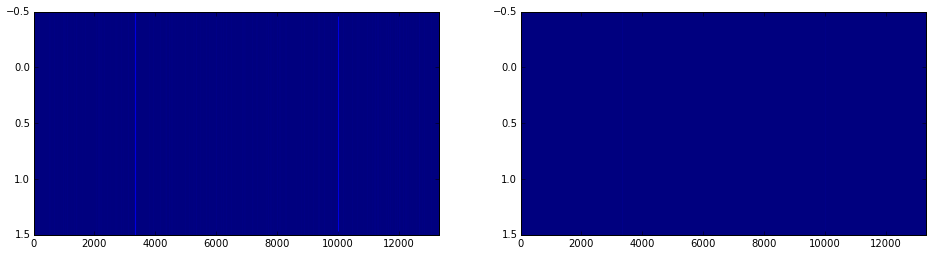

In [65]:
subplot(121)
imshow(mag_spectrum, aspect='auto')
subplot(122)
imshow(pow_spectrum, aspect='auto')

gcf().set_figwidth(16)

In [66]:
array(mag_spectrum).shape

(2, 13341)

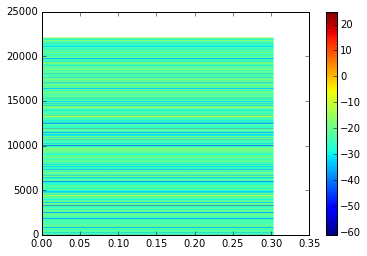

In [67]:
sout = specgram(signal[:40000], NFFT=26681, noverlap=0, window=window_none, Fs= sr);

sout[0].shape, sout[1].shape, sout[2].shape
colorbar();

Transformed the sound into color varietaion, it is not same as the 
example in the class, because, my graph was more regular graph compare
to the example.

<matplotlib.colorbar.Colorbar instance at 0x10bd96878>

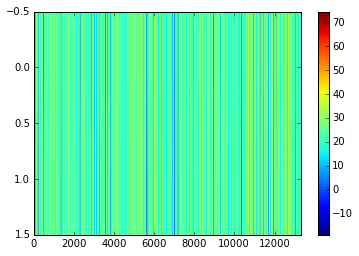

In [68]:
imshow(10*log10(pow_spectrum), aspect='auto')
colorbar()

(0, 1024)

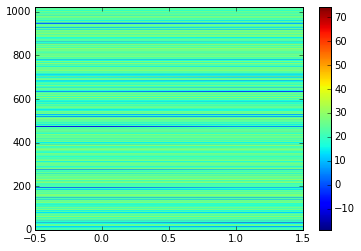

In [69]:
imshow(10*log10(pow_spectrum).T, aspect='auto')
colorbar()
ylim((0, 1024))

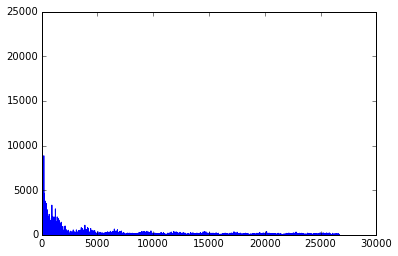

In [70]:
plot(abs(fft.rfft(x)))

/Users/intaehwang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


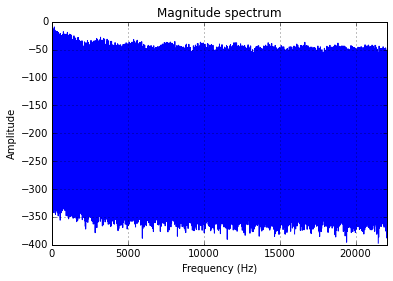

In [71]:
def plot_mag_spectrum(x, sr=44100, db=True):
    X = fft.rfft(x)
    fw = linspace(0, sr/2.0, len(X))
    if db:
        plot(fw,20*log10(abs(X)/(len(X) - 1))) 
    else:
        plot(fw,abs(X)/(len(X) - 1))  
    ylabel('Amplitude'); xlabel('Frequency (Hz)'); title('Magnitude spectrum')
    xlim((0, sr/2.0))
    grid(True)
    
plot_mag_spectrum(x)


Thus, single image file went through many transforms, its changes were 
accumulated.

/Users/intaehwang/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


(0, 5000)

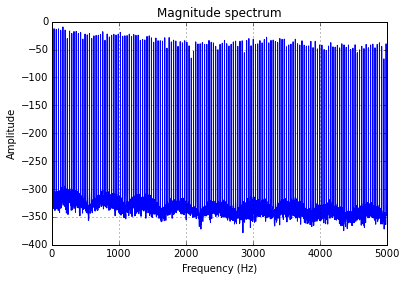

In [72]:
plot_mag_spectrum(x)
xlim(0,5000)

I zoomed in, its pattern looks interesting.

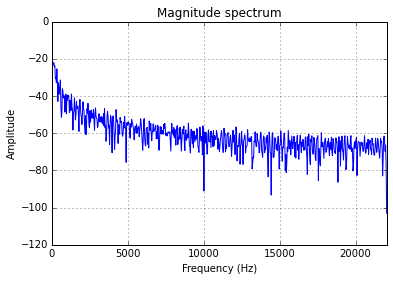

In [73]:
N = 512
x = sin(sig) + (0.01 * sin(sig * 1.11))
plot_mag_spectrum(x)

Start to apply several window filter.

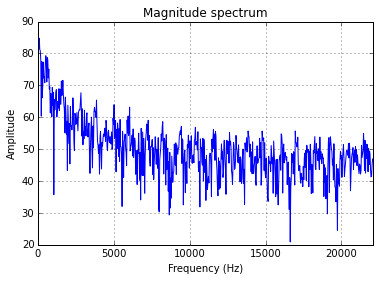

In [79]:
x += 2* sin(sig*22)*10
plot_mag_spectrum(x)

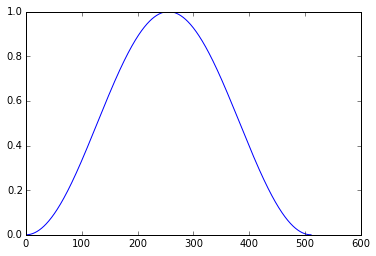

In [80]:
plot(hanning(N))

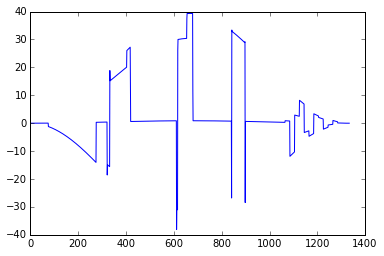

In [81]:
plot(hanning(N*2.605)*x);

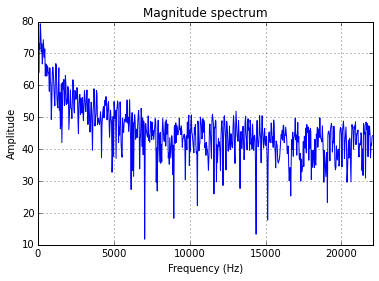

In [82]:
plot_mag_spectrum(hanning(N*2.605)*x)

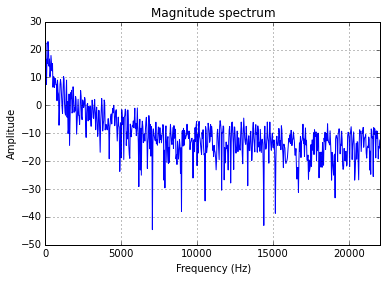

In [83]:
def plot_mag_spectrum(x, sr=44100, db=True, window=window_none):
    w = window(len(x))
    X = fft.rfft(window(len(x)) *x)
    fw = linspace(0, sr/2.0, len(X))
    if db:
        plot(fw,20*log10(abs(X)/(sum(w)/2.0)))  # assumes real FFT
    else:
        plot(fw,abs(X)/(sum(w)/2.0))  # assumes real FFT
    ylabel('Amplitude'); xlabel('Frequency (Hz)'); title('Magnitude spectrum')
    xlim((0, sr/2.0))
    grid(True)
plot_mag_spectrum(x,window=hanning)

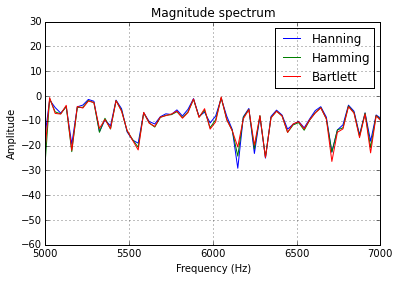

In [84]:
plot_mag_spectrum(x, window=hanning)
plot_mag_spectrum(x, window=hamming)
plot_mag_spectrum(x, window=bartlett)

xlim((5000,7000))
legend(['Hanning', 'Hamming', 'Bartlett'], loc='best')

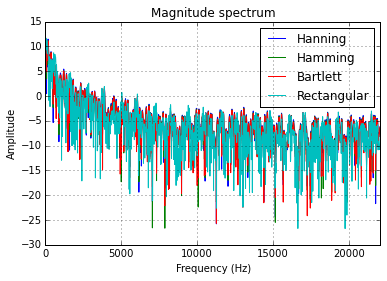

In [85]:
def plot_mag_spectrum(x, sr=44100, db=True, window=window_none, zp=13341):
    w = window(len(x))
    padded_x = r_[window(len(x)) *x, zeros(zp)]
    X = fft.rfft(padded_x)
    fw = linspace(0, sr/2.0, len(X))
    if db:
        plot(fw,10*log10(abs(X)/(sum(w)/2.0)))  # assumes real FFT
    else:
        plot(fw,abs(X)/(sum(w)/2.0))  # assumes real FFT
    ylabel('Amplitude'); xlabel('Frequency (Hz)'); title('Magnitude spectrum')
    xlim((0, sr/2.0))
    grid(True)

plot_mag_spectrum(x, window=hanning, zp=13441)
plot_mag_spectrum(x, window=hamming, zp=13441)
plot_mag_spectrum(x, window=bartlett, zp=13441)
plot_mag_spectrum(x, window=ones, zp=13441)

#xlim((5000, 7000))
legend(['Hanning', 'Hamming', 'Bartlett', 'Rectangular'], loc='best')

Zero padding of the original image.

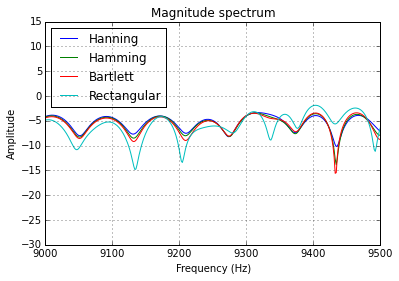

In [86]:
plot_mag_spectrum(x, window=hanning, zp=26681)
plot_mag_spectrum(x, window=hamming, zp=26681)
plot_mag_spectrum(x, window=bartlett, zp=26681)
plot_mag_spectrum(x, window=ones, zp=26681)

xlim((9000, 9500))
#ylim((-40, 5))
legend(['Hanning', 'Hamming', 'Bartlett', 'Rectangular'], loc='best')

Zoom in, all they are seems similiar.

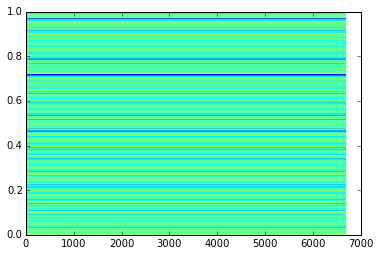

In [89]:
sout = specgram(signal[:20000], NFFT=26681, noverlap=0);

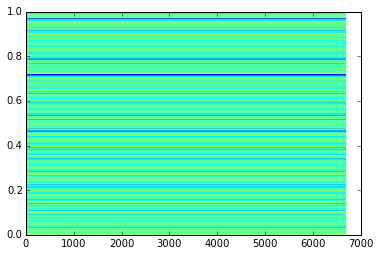

In [92]:
sout = specgram(signal[:20000], NFFT=26681, noverlap=1024);

TypeError: Dimensions of C (13341, 79) are incompatible with X (13341) and/or Y (79); see help(pcolor)

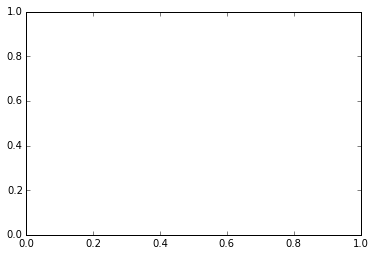

In [93]:
fs = 44100.0

win_start = arange(0, 40000, 512)
win_len = 26681

pow_spectrum = []

for start in win_start:
    win = signal[start: start + win_len]
    wf = hamming(win_len)
    X = fft.rfft(win * wf)
    pow_spectrum.append(abs(X)**2/(sum(wf)/2.0))


x = log(linspace( 1, 22050, win_len/1.9998 ))
y = linspace( 0, len(pow_spectrum),79)

d = 10*log10(pow_spectrum).T

X, Y = meshgrid(x, y);
pcolor(X, Y, d, antialiased= True);

I couldn't figure it out how to fix this problem.

In [101]:
zip(mag_spectrum, pow_spectrum)

[(array([ 45.55127436,   0.10711801,   0.08795937, ...,   0.64687098,
           1.15062065,   3.55821112]),
  array([  1.49762829e+07,   2.72139889e+06,   7.73358599e-02, ...,
           6.99800631e+00,   2.95274070e+03,   1.51213631e+05])),
 (array([ 45.53875562,   0.11399012,   0.09512458, ...,   0.64660972,
           1.15083981,   3.55860815]),
  array([  1.49703527e+07,   2.72026271e+06,   6.06463767e-02, ...,
           1.36058343e+01,   2.97936466e+03,   1.50667063e+05]))]

In [102]:
mag_spectrum1 = np.hstack(mag_spectrum)

Thus, I just did inverse Fourier transform

In [103]:
pow_spectrum1 = np.hstack(pow_spectrum)

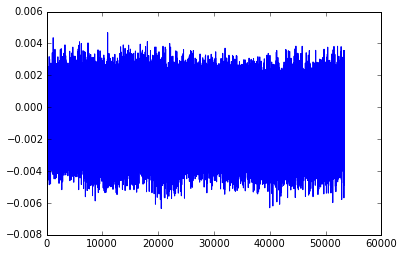

In [104]:
X = [np.complex(cos(sig1)* mag, sin(sig1)* mag) for mag, sig1 in zip(mag_spectrum1,pow_spectrum1)]
x = fft.irfft(X)
plot(x)

In [105]:
x.dtype

dtype('float64')

In [106]:
wavfile.write('sigout33.wav',44100,array(x, dtype=float64))

In [108]:
mag_spec = [0] + ([0,0,0,0,0,0,1] * 4)
mag_spectrum1*4 * 4
len(mag_spectrum1)
mag_spec += [0]

In [109]:
pow_spectrum1 = zeros(33)
X = [np.complex(cos(sig1)* mag, sin(sig1)* mag) for mag, sig1 in zip(mag_spectrum1, pow_spectrum1)]

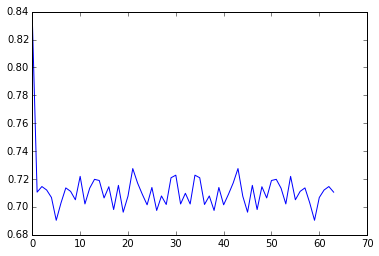

In [110]:
x = fft.irfft(X)
plot(x)

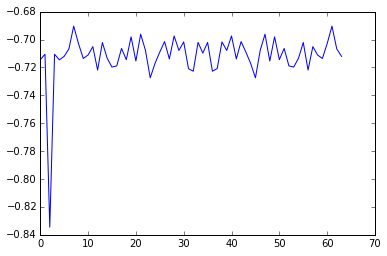

In [111]:
pow_spectrum1 = linspace(pi, -pi, 33)
X = [np.complex(cos(phs)* mag, sin(phs)* mag) for mag, phs in zip(mag_spectrum1, pow_spectrum1)]
x = fft.irfft(X)
plot(x)

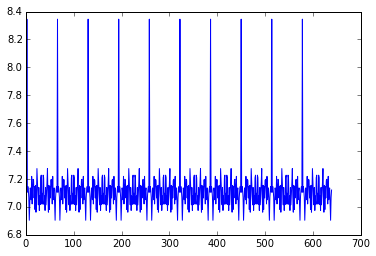

In [112]:
sigout23 = list(abs(array(fft.irfft(X))*10))*10
plot(sigout23)
            

In [ ]:
I review the class three example in this homework, the way I did the 
homework wasn't creative, but it was helpful to understand how transform
works. (It is still hard for me.)